In [ ]:
#Sistema de Probabilidad para Clasificación Clientes
#Preferenciales de un Banco

# Ejemplo, si la cantidad de dinero ahorrado en el banco es de 20 millones
# y el salario que gana es de 6 millones, la probabilidad de que el cliente
# sea preferencial es de ---> x% preferencial



In [1]:
!pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 12.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894079 sha256=9aaed120f5f23d4eae93366163f0d91299c4d0415bdd5bc52e91c8b172483033
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [14]:
# Variables de Entrada
Cantidad_dinero_ahorrado = ctrl.Antecedent(np.arange(0,600*10**6,25*10**6),'Cantidad_dinero_ahorrado')
Salario_cliente = ctrl.Antecedent(np.arange(0,16*10**6,1*10**6),'Salario_cliente')
# Los limites especificados en la cantidad de dinero estan multiplicados por un termino de 10^6
# para representar que son millones, lo mismo se realiza en el salario del cliente

# Variables de Salida
Probabilidad_cliente_preferencial = ctrl.Consequent(np.arange(0,101,10),'Probabilidad_cliente_preferencial')

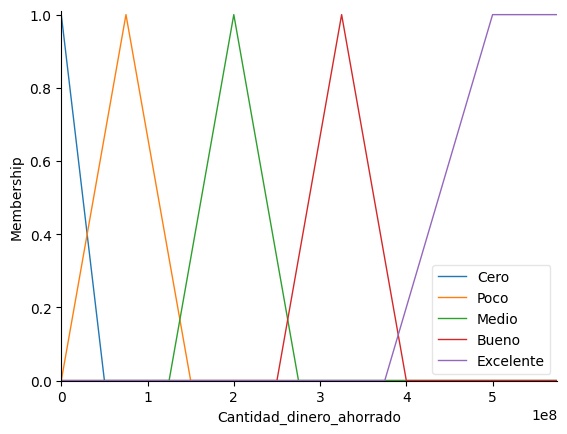

In [15]:
# Funciones de Membresia

# Cantidad dinero ahorrado
Cantidad_dinero_ahorrado['Cero'] = fuzz.trimf(Cantidad_dinero_ahorrado.universe,[0,0,50*10**6])
Cantidad_dinero_ahorrado['Poco'] = fuzz.trimf(Cantidad_dinero_ahorrado.universe,[0,75*10**6,150*10**6])
Cantidad_dinero_ahorrado['Medio'] = fuzz.trimf(Cantidad_dinero_ahorrado.universe,[125*10**6,200*10**6,275*10**6])
Cantidad_dinero_ahorrado['Bueno'] = fuzz.trimf(Cantidad_dinero_ahorrado.universe,[250*10**6,325*10**6,400*10**6])
Cantidad_dinero_ahorrado['Excelente'] = fuzz.trapmf(Cantidad_dinero_ahorrado.universe,[375*10**6,500*10**6,600*10**6,600*10**6])

Cantidad_dinero_ahorrado.view()

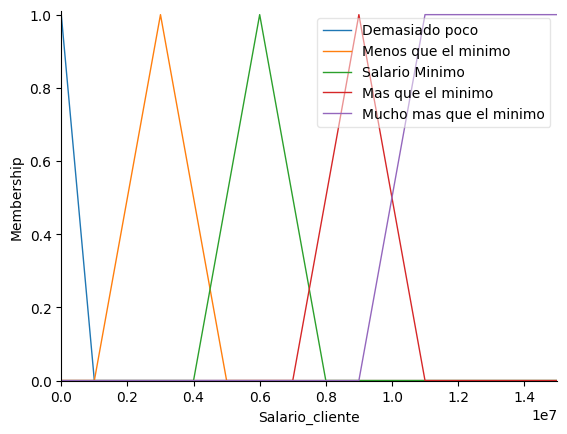

In [16]:
# Salario del cliente
Salario_cliente['Demasiado poco'] = fuzz.trimf(Salario_cliente.universe,[0,0,1*10**6])
Salario_cliente['Menos que el minimo'] = fuzz.trimf(Salario_cliente.universe,[1*10**6,3*10**6,5*10**6])
Salario_cliente['Salario Minimo'] = fuzz.trimf(Salario_cliente.universe,[4*10**6,6*10**6,8*10**6])
Salario_cliente['Mas que el minimo'] = fuzz.trimf(Salario_cliente.universe,[7*10**6,9*10**6,11*10**6])
Salario_cliente['Mucho mas que el minimo'] = fuzz.trapmf(Salario_cliente.universe,[9*10**6,11*10**6,16*10**6,16*10**6])

Salario_cliente.view()

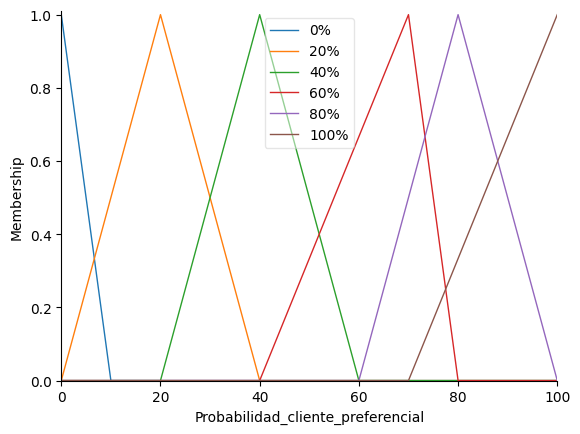

In [29]:
# Probabilidad cliente preferencial
Probabilidad_cliente_preferencial['0%'] = fuzz.trimf(Probabilidad_cliente_preferencial.universe,[0,0,10])
Probabilidad_cliente_preferencial['20%'] = fuzz.trimf(Probabilidad_cliente_preferencial.universe,[0,20,40])
Probabilidad_cliente_preferencial['40%'] = fuzz.trimf(Probabilidad_cliente_preferencial.universe,[20,40,60])
Probabilidad_cliente_preferencial['60%'] = fuzz.trimf(Probabilidad_cliente_preferencial.universe,[40,70,80])
Probabilidad_cliente_preferencial['80%'] = fuzz.trimf(Probabilidad_cliente_preferencial.universe,[60,80,100])
Probabilidad_cliente_preferencial['100%'] = fuzz.trimf(Probabilidad_cliente_preferencial.universe,[70,100,100])

Probabilidad_cliente_preferencial.view()

In [37]:
# Reglas Difusas del Controlador

regla11 = ctrl.Rule(Cantidad_dinero_ahorrado['Cero'] & Salario_cliente['Demasiado poco'],Probabilidad_cliente_preferencial['0%'])
regla12 = ctrl.Rule(Cantidad_dinero_ahorrado['Cero'] & Salario_cliente['Menos que el minimo'],Probabilidad_cliente_preferencial['0%'])
regla13 = ctrl.Rule(Cantidad_dinero_ahorrado['Cero'] & Salario_cliente['Salario Minimo'],Probabilidad_cliente_preferencial['20%'])
regla14 = ctrl.Rule(Cantidad_dinero_ahorrado['Cero'] & Salario_cliente['Mas que el minimo'],Probabilidad_cliente_preferencial['60%'])
regla15 = ctrl.Rule(Cantidad_dinero_ahorrado['Cero'] & Salario_cliente['Mucho mas que el minimo'],Probabilidad_cliente_preferencial['60%'])

regla21 = ctrl.Rule(Cantidad_dinero_ahorrado['Poco'] & Salario_cliente['Demasiado poco'],Probabilidad_cliente_preferencial['20%'])
regla22 = ctrl.Rule(Cantidad_dinero_ahorrado['Poco'] & Salario_cliente['Menos que el minimo'],Probabilidad_cliente_preferencial['20%'])
regla23 = ctrl.Rule(Cantidad_dinero_ahorrado['Poco'] & Salario_cliente['Salario Minimo'],Probabilidad_cliente_preferencial['20%'])
regla24 = ctrl.Rule(Cantidad_dinero_ahorrado['Poco'] & Salario_cliente['Mas que el minimo'],Probabilidad_cliente_preferencial['60%'])
regla25 = ctrl.Rule(Cantidad_dinero_ahorrado['Poco'] & Salario_cliente['Mucho mas que el minimo'],Probabilidad_cliente_preferencial['60%'])

regla31 = ctrl.Rule(Cantidad_dinero_ahorrado['Medio'] & Salario_cliente['Demasiado poco'],Probabilidad_cliente_preferencial['20%'])
regla32 = ctrl.Rule(Cantidad_dinero_ahorrado['Medio'] & Salario_cliente['Menos que el minimo'],Probabilidad_cliente_preferencial['40%'])
regla33 = ctrl.Rule(Cantidad_dinero_ahorrado['Medio'] & Salario_cliente['Salario Minimo'],Probabilidad_cliente_preferencial['40%'])
regla34 = ctrl.Rule(Cantidad_dinero_ahorrado['Medio'] & Salario_cliente['Mas que el minimo'],Probabilidad_cliente_preferencial['80%'])
regla35 = ctrl.Rule(Cantidad_dinero_ahorrado['Medio'] & Salario_cliente['Mucho mas que el minimo'],Probabilidad_cliente_preferencial['80%'])

regla41 = ctrl.Rule(Cantidad_dinero_ahorrado['Bueno'] & Salario_cliente['Demasiado poco'],Probabilidad_cliente_preferencial['20%'])
regla42 = ctrl.Rule(Cantidad_dinero_ahorrado['Bueno'] & Salario_cliente['Menos que el minimo'],Probabilidad_cliente_preferencial['40%'])
regla43 = ctrl.Rule(Cantidad_dinero_ahorrado['Bueno'] & Salario_cliente['Salario Minimo'],Probabilidad_cliente_preferencial['60%'])
regla44 = ctrl.Rule(Cantidad_dinero_ahorrado['Bueno'] & Salario_cliente['Mas que el minimo'],Probabilidad_cliente_preferencial['80%'])
regla45 = ctrl.Rule(Cantidad_dinero_ahorrado['Bueno'] & Salario_cliente['Mucho mas que el minimo'],Probabilidad_cliente_preferencial['80%'])

regla51 = ctrl.Rule(Cantidad_dinero_ahorrado['Excelente'] & Salario_cliente['Demasiado poco'],Probabilidad_cliente_preferencial['20%'])
regla52 = ctrl.Rule(Cantidad_dinero_ahorrado['Excelente'] & Salario_cliente['Menos que el minimo'],Probabilidad_cliente_preferencial['40%'])
regla53 = ctrl.Rule(Cantidad_dinero_ahorrado['Excelente'] & Salario_cliente['Salario Minimo'],Probabilidad_cliente_preferencial['60%'])
regla54 = ctrl.Rule(Cantidad_dinero_ahorrado['Excelente'] & Salario_cliente['Mas que el minimo'],Probabilidad_cliente_preferencial['80%'])
regla55 = ctrl.Rule(Cantidad_dinero_ahorrado['Excelente'] & Salario_cliente['Mucho mas que el minimo'],Probabilidad_cliente_preferencial['100%'])

In [38]:
Sistema_control = ctrl.ControlSystem(
    [
        regla11,
        regla12,
        regla13,
        regla14,
        regla15,
        regla21,
        regla22,
        regla23,
        regla24,
        regla25,
        regla31,
        regla32,
        regla33,
        regla34,
        regla35,
        regla41,
        regla42,
        regla43,
        regla44,
        regla45,
        regla51,
        regla52,
        regla53,
        regla54,
        regla55
    ]
)

Controlador = ctrl.ControlSystemSimulation(Sistema_control)

In [39]:
#Pruebas

# 1. Adriana debe tener una probabilidad de al menos 90% de ser preferencial, tiene 500
#    Millones ahorrados y tiene un salario de $15 Millones al mes.

Controlador.input['Cantidad_dinero_ahorrado'] = 500*10**6
Controlador.input['Salario_cliente'] = 15*10**6

Controlador.compute()

# Resultado
Probabilidad_calculada = Controlador.output['Probabilidad_cliente_preferencial']
print (f"La Probabilidad de que Adriana sea cliente preferencial es de: {Probabilidad_calculada}")

La Probabilidad de que Adriana sea cliente preferencial es de: 90.00000000000001


In [40]:
# 2. Nelson debe tener una probabilidad alrededor de 60% de ser preferencial, tiene $30
#    millones ahorrados y un salario de $9 millones al mes.

Controlador.input['Cantidad_dinero_ahorrado'] = 30*10**6
Controlador.input['Salario_cliente'] = 9*10**6

Controlador.compute()

# Resultado
Probabilidad_calculada = Controlador.output['Probabilidad_cliente_preferencial']
print (f"La Probabilidad de que Nelson sea cliente preferencial es de: {Probabilidad_calculada}")

La Probabilidad de que Nelson sea cliente preferencial es de: 61.83333333333332


In [41]:
# 3. Federico no debe sobrepasar una probabilidad de 20% de ser preferencial, tiene $40
#    millones ahorrados y un salario de $1.160.000 al mes.

Controlador.input['Cantidad_dinero_ahorrado'] = 40*10**6
Controlador.input['Salario_cliente'] = 1.16*10**6

Controlador.compute()

# Resultado
Probabilidad_calculada = Controlador.output['Probabilidad_cliente_preferencial']
print (f"La Probabilidad de que Federico sea cliente preferencial es de: {Probabilidad_calculada}")

La Probabilidad de que Federico sea cliente preferencial es de: 19.602721088435374


In [42]:
# 4. Verónica debe estar alrededor de un 5% de ser preferencial, no tiene dinero
# ahorrado en el banco y su salario es de $1.500.000
Controlador.input['Cantidad_dinero_ahorrado'] = 0*10**6
Controlador.input['Salario_cliente'] = 1.5*10**6

Controlador.compute()

# Resultado
Probabilidad_calculada = Controlador.output['Probabilidad_cliente_preferencial']
print (f"La Probabilidad de que Verónica sea cliente preferencial es de: {Probabilidad_calculada}")

La Probabilidad de que Verónica sea cliente preferencial es de: 4.404761904761905
